# 2. Filtros FIR (Diseño)

En el Capítulo 1 se mostró que existen dos tipos de filtros digitales, FIR e IIR, dependiendo de la estructura de la ecuación en diferencia que conducen a comportamientos distintos en la forma de la respuesta al impulso: 

|      | FIR	|  IIR |
|------|------|------|
|Forma de $h[n]$ | Respuesta Finita al Impulso | Respuesta Infinita al Impulso |
|Ecuación en diferencias | $y[n] = \sum _{k=0} ^{Q} {b_k x[n-k]} $ | $y[n]=\sum _{k=0}^{Q}{b_k x[n-k]} - \sum _{k=1}^{P}{a_k y[n-k]}$ |
|Característica de la E.D. | Depende exclusivamente de entradas	| Depende de entradas y salidas |
|Cálculo de coeficientes | $b_k$ es la respuesta al impulso y se calcula por medio de $b_k = \mathcal{F} ^{-1} \{ H(\Omega) \}$	| $a_k$ y $b_k$ se calculan por medio de equivalencias con filtros analógicos |
|Respuesta en frecuencia | $H(\Omega) = \sum _{k=0} ^{Q} {b_k e^{-j \Omega k} }$ | $H(\Omega) =\frac{ \sum _{k=0} ^{Q} {b_k e^{-j \Omega k} } } { 1 + \sum _{k=1} ^{P} {a_k e^{-j \Omega k} }}$ |

Si la ecuación en diferencias depende exclusivamente de entradas (ecuación no recursiva), los filtros tendrán respuesta finita al impulso de allí el nombre **FIR**, por sus siglas en inglés (**_Finite Impulse Response_**). En caso contrario, si la ecuación en diferencias depende tanto de entradas como salidas (ecuación recursiva), los filtros se denominan **IIR** (**_Infinite Impulse Response_**) dado a que la recursividad conduce a una respuesta al impulso de longitud infinita. En la tabla anterior se muestran otras características que se explicarán en éste y los siguientes capítulos.

En este capítulo se describen en detalle las características de los filtros digitales FIR. Como se demostró en el capítulo anterior, la ecuación en diferencias de este tipo de filtros es la sumatoria de convolución, en la que la longitud de la respuesta al impulso es un vector de $N_{h}$ datos. Bajo este principio, el diseño de un filtro FIR se limita al cálculo de la respuesta al impulso $h[n]$, razón por la cual se estudian en este capítulo tres técnicas básicas para determinarla: enventanamiento, muestreo en frecuencia y filtros óptimos. En el siguiente capítulo se abordarán diferentes estructuras de implementación.  

## 2.1 Filtros y Sistemas LTI

Un filtro se puede definir como un sistema que elimina ciertas componentes de frecuencias de la señal de entrada. Aunque existen varios tipos estándares de filtros (pasa-bajo, pasa-alto, pasa-banda y atrapa-banda), cuyas respuestas ideales en frecuencia se muestran en la figura, nos referiremos en forma general con el término filtro a cualquier sistema LTI. 

![Tipos básicos de filtros](../img/cap2_tiposfiltros.png)

Para los sistemas LTI, se demostró en el capítulo anterior que la señal de salida $y[n]$ se puede calcular mediante la sumatoria de convolución entre la señal de entrada $x[n]$ y la respuesta al impulso $h[n]$ del sistema:

$$y[n]=x[n]\star h[n]=\sum_{k=-\infty}^{\infty}x[k]\!h[n-k]=\sum_{k=-\infty}^{\infty}h[k]\!x[n-k]$$

y equivalentemente en la frecuencia, aplicando las propiedades de la transformada de Fourier:

$$Y(\Omega)=H(\Omega)X(\Omega)$$

lo que significa que el espectro de la señal de salida $Y(\Omega)$ será el producto entre el espectro de la señal de entrada $X(\Omega)$ y la respuesta en frecuencia del sistema $H(\Omega)$, es decir, la respuesta en frecuencia establecerá, según su magnitud $|H(\Omega)|$, cuales componentes de frecuencia pasan y cuales se atenúan. Esta es la razón del nombre de los filtros estándares:

* **Filtro pasa-bajo**: únicamente las componentes de frecuencia de la señal de entrada por debajo de la frecuencia de corte ($\Omega_{c}$), estarán presentes en el espectro de la señal de salida.

* **Filtro pasa-alto**: A diferencia con el pasa-bajo, únicamente pasan las componentes de frecuencia de la señal de entrada por encima de la frecuencia de corte ($\Omega_{c}$).

* **Filtro pasa-banda**: La señal de la salida solamente poseerá componentes de frecuencias ubicadas entre el rango $\Omega_{1}\leq\Omega\leq\Omega_{2}$. El término $\Omega_{c}$ se denomina frecuencia central y es igual al promedio entre $\Omega_{1}$ y $\Omega_{2}$; $\Omega_{BW}$ se denomina ancho banda y equivale a la diferencia: $\Omega_{BW}=\Omega_{2}-\Omega_{1}$.

* **Filtro atrapa-banda**: A diferencia con el pasa-banda, la región de frecuencias por fuera de la región comprendida entre $\Omega_{1}$ y $\Omega_{2}$ pasarán por el sistema. $\Omega_{c}$ y $\Omega_{BW}$ tienen el mismo significado del filtro pasa-banda.

Todos los tipos de filtros estándares se pueden modelar a partir de un filtro pasa-bajo equivalente (Sección 2.3), por tal motivo nos centraremos por ahora en el estudio y diseño de filtros pasa-bajos. 

Puesto que las formas de los filtros mostradas en la figura de arriba son ideales, para un filtro real se tienen definidos ciertos parámetros:

![Parámetros de un filtro real](../img/cap2_paramfiltro.png)

* **Banda de paso**: Corresponde a la región de frecuencias que deja pasar el filtro.

* **Banda de atenuación o de rechazo**: Es la región de frecuencias que elimina el filtro.

* **Banda de transición** ($\Delta$): Es la región de frecuencias ubicada entre la banda de paso y la de rechazo. El ancho de esta banda define la selectividad del filtro. La selectividad indica el grado de similitud con el filtro ideal, por obvias razones a un menor $\Delta$ habrá una mejor selectividad el filtro, puesto que será menor el número componentes de frecuencias indeseadas que permitirá pasar el filtro.

* **Rizado** ($\delta_{1}, \delta_{2}$): En la gran mayoría de filtros reales no es posible tener un conjunto de bandas de paso y rechazo completamente planas. Por desgracia existe un gran compromiso entre la selectividad del filtro y el rizado, ya que una alta selectividad exige un mayor rizado en las bandas.

En el caso de filtros que no tengan las formas estándares antes descritas, de la expresión $Y(\Omega)=H(\Omega)X(\Omega)$ se deriva que

$$H(\Omega)=\frac{Y(\Omega)}{X(\Omega)}$$

lo que significa que la respuesta en frecuencia da cuenta de la forma como atenúan o amplifican las diferentes componentes de frecuencia.

## 2.2 Características de un Filtro FIR


Los filtros FIR hacen uso directo de la sumatoria de convolución para calcular la señal de salida $y[n]$. Por cuestiones de implementación, la sumatoria infinita que define la convolución no sería práctica, por esta razón la respuesta al impulso, $h[n]$ debe tener una longitud finita. Si la longitud de $h[n]$ se acota a $N_h$ muestras, definida en el rango $0\leq n\leq N_{h}-1$, la ecuación de la convolución, mostrada en la sección anterior, se reduce a: 

$$y[n]=\sum_{k=0}^{N_{h}-1}h[k]x[n-k]$$

que corresponde a una ecuación en diferencias no recursiva, de orden $N_{h}-1$. De esta característica deriva el nombre filtro de respuesta finita al impulso (FIR). 

El rango elegido para $n$ implica que el sistema sea causal, dado a que al expandir la sumatoria de convolución, el cálculo de $y[n]$ dependerá exclusivamente de la muestra presente ($x[n]$) y las pasadas ($x[n-1]$, $x[n-2]$, ...) de la señal de entrada:

$$y[n]=h[0]x[n] + h[1]x[n-1] + h[2]x[n-2] + ... + h[N_h-1] x[n-(N_h-1)]$$

En la Sección 1.4 se mostró otra forma de representar los filtros FIR dada por

$$y[n]=\sum_{k=0}^{N_{h}-1}b_{k}x[n-k]$$

Lo que significa que en un filtro FIR, los coeficientes constantes $b_{k}$ son la respuesta al impulso, $h[k]$.

El diseño de los sistemas FIR se limita a calcular la respuesta al impulso, y para su respectiva implementación basta con escribir un algoritmo que calcule la sumatoria de convolución.

### 2.2.1 Respuesta en Frecuencia

La respuesta en frecuencia en un sistema FIR puede encontrarse fácilmente a partir de la DTFT de la ecuación de convolución y usando la relación $H(\Omega)=\frac{Y(\Omega)}{X(\Omega)}$:

$$H(\Omega)=\sum_{k=0}^{N_{h}-1}b_{k}\exp(-j\Omega k)$$

Además, de la transformada Z de la ecuación de convolución se deriva su respectiva función de transferencia:

$$H(z)=\sum_{k=0}^{N_{h}-1}b_{k}z^{-k}$$

Por lo tanto, un filtro FIR se caracteriza porque posee $N_{h}-1$ polos en el origen y $N_{h}-1$ ceros distribuidos en cualquier parte del plano Z. Puesto que los ceros del sistema pueden estar en cualquier lugar del plano Z, un filtro FIR será siempre estable. En la siguiente figura se ilustra la disposición de los polos y ceros de un filtro FIR especial denominado de **filtro de media móvil** de $N_{h}=12$, en el cual $$b_{k}=\frac{1}{N_{h}}\,\,\,0\leq k\leq N_{h}-1$$ nótese que los ceros se encuentran equiespaciados y existe un polo en el origen de multiplicidad $N_{h}-1=11$. Es de resaltar que esta misma configuración de polos y ceros (únicamente cambia el radio de cada cero) la presenta cualquier tipo de filtro FIR.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11580\1468981911.py:19: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(w/np.pi, 20*np.log10(np.abs(Hw)))


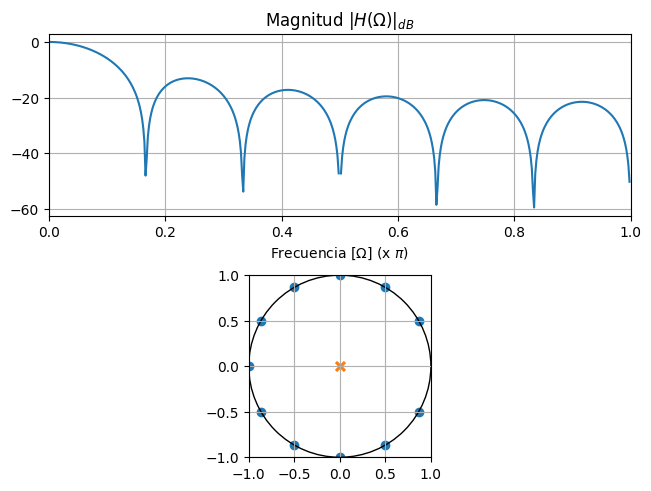

In [3]:
#Ejemplo 2.2.1. Cálculo de la respuesta en frecuencia y diagrama de polos y ceros de un filtro de media móvil
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

#Respuesta al impulso del filtro de media móvil
Nh = 12
bk = (1/Nh)*np.ones((Nh,)) 

#Cálculo respuesta en frecuencia
w, Hw = sig.freqz(bk)

#Crea la función de transferencia
ak = sig.unit_impulse(Nh)
sys = sig.TransferFunction(bk, ak, dt=0.1)

#Grafica magnitud de la respuesta en frecuencia
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(w/np.pi, 20*np.log10(np.abs(Hw)))
axs[0].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[0].set_title(r'Magnitud $|H(\Omega)|_{dB}$')
axs[0].set(xlim=(0,1))
axs[0].grid()

#Grafica la ubicación de los polos y ceros
axs[1].scatter(sys.zeros.real, sys.zeros.imag, marker='o')
axs[1].scatter(sys.poles.real, sys.poles.imag, marker='x')
axs[1].grid(True)
unit_circle = plt.Circle((0, 0), 1 , fill = False)
axs[1].set_aspect(1)
axs[1].add_artist(unit_circle)
maxv = np.max([np.max(np.abs(sys.zeros.real)), np.max(np.abs(sys.zeros.imag)), np.max(np.abs(sys.poles.real)), np.max(np.abs(sys.zeros.imag)), 1])
axs[1].set(xlim=(-maxv,maxv), ylim=(-maxv,maxv))
plt.show()

En la simulación anterior, la magnitud de la respuesta en frecuencia se graficó en decibeles, $$|H(\Omega)|_{dB}=10log_{10}|H(\Omega)|^2 = 20log_{10}|H(\Omega)|$$ que es una forma útil de magnificar las magnitudes pequeñas de la respuesta en frecuencia.  

Asimismo, en la simulación, fue necesario crear un vector de coeficientes $a_k = \delta[k]$. Aunque la función de transferencia de un filtro FIR no tiene explícito los coeficientes $a_k$, hay que tener en cuenta que realmente el único diferente de cero es $a_0 = 1$.

Finalmente, como se mostró al inicio de esta sección, $h[n]$ se consideró causal. Si $h[n]$ no fuera causal y tuviera una respuesta al impulso de longitud impar $N_{h}$ definida en el rango $$-\frac{N_{h}-1}{2}\leq n\leq\frac{N_{h}-1}{2}$$ para volver el sistema causal basta con desplazar su respuesta al impulso $\frac{N_{h}-1}{2}$ muestras, lo que equivale en frecuencia a multiplicar $H(\Omega)$ por $$\exp\left(-j\frac{N_{h}-1}{2}\Omega\right)$$ 

La respuesta en frecuencia del sistema no se altera al aplicar este truco, solamente se modifica la respuesta de la fase del sistema, ya que el efecto de este desplazamiento es: 

* agregar polos en el origen, los cuales no modifican la forma de magnitud de la respuesta en frecuencia; y
* si la respuesta en la fase del sistema no causal es lineal, el sistema seguirá teniendo respuesta lineal de la fase.

### Para reflexionar

El filtro de media móvil analizado en el Ejemplo 2.2.1 era causal. Si la señal de entrada fuera un archivo de audio pre-grabado (por ejemplo, una canción en formato MP3) ¿Será posible implementar el filtro de media móvil de manera no causal? ¿Cómo se implementaría de manera no causal? ¿Qué cambio se produce en la respuesta en frecuencia del filtro?

### 2.2.2 Linealidad en la Fase


Los filtros FIR son sistemas que poseen una fase lineal si la respuesta al impulso presenta una simetría par o impar, esto es:

* $h[n]=\pm h[-n]\quad$ Para la respuesta al impulso del filtro en versión no causal.

* $h[n]=\pm h[(N_{h}-1)-n]\quad$ Para la respuesta al impulso del filtro en versión causal.


Se puede ver que estas condiciones de simetría aplicadas en la función de transferencia conducen al siguiente comportamiento: 

$$H(z)=b_{0}+b_{1}z^{-1}+...+b_{N_{h}-2}z^{-(N_{h}-2)}+b_{N_{h}-1}z^{-(N_{h}-1)} = $$

$$\pm(b_{N_{h}-1}+b_{N_{h}-2}z^{-1}+...+b_{1}z^{-(N_{h}-2)}+b_{0}z^{-(N_{h}-1)})$$

De esta forma, la condición de fase lineal, en términos de la función de transferencia, se puede expresar también como:

$$H(z)=\pm z^{-(N_{h}-1)}H(z^{-1})$$

#### _Demostración_: 


Si un sistema tiene fase lineal, $$\Phi(\Omega)=\arctan \left( \frac{\Im m\{H(\Omega)\}}{\Re e\{H(\Omega)\}} \right) = c\Omega$$ 

por consiguiente,

$$\tan(c\Omega)=\frac{sen(c\Omega)}{cos(c\Omega)}=\frac{\Im m\{H(\Omega)\}}{\Re e\{H(\Omega)\}}$$

lo cual es cierto sí:

$$H(\Omega)=F(\Omega)e^{jc\Omega}$$

donde $F(\Omega)$ es una función real.

Ahora, expandamos la ecuación de la respuesta en frecuencia de un filtro FIR, y factorizamos el término $e^{jc\Omega}$:

$$H(\Omega)=\left\{ b_{0}e^{-jc\Omega}+b_{1}e^{-j(c+1)\Omega}+...+b_{N_{h}-1}e^{-j(c+N_{h}-1)\Omega}\right\}e^{jc\Omega}$$ 

si $c=-\frac{N_{h}-1}{2}$, la función $F(\Omega)$ tomará la forma:

$$F(\Omega)=b_{0}e^{j\frac{N_{h}-1}{2}\Omega}+b_{1}e^{j\frac{N_{h}-3}{2}\Omega}+...+b_{N_{h}-2}e^{-j\frac{N_{h}-3}{2}\Omega}+b_{N_{h}-1}e^{-j\frac{N_{h}-1}{2}\Omega}$$ 

y puede ser una función real únicamente si podemos usar las sustituciones $cos(x)=\frac{e^{x}+e^{-x}}{2}$ y $sen(x)=\frac{e^{x}-e^{-x}}{2j}$, lo cual es posible si $b_{0}=b_{N_{h}-1}$ o $b_{0}=-b_{N_{h}-1}$; $b_{1}=b_{N_{h}-2}$ o $b_{1}=-b_{N_{h}-2}$, o en forma general:

$$b_{k}=\pm b_{N_{h}-1-k}$$

es decir, si la respuesta al impulso tiene simetría par o impar.

Nótese que $F(\Omega)$ es la versión no causal de la respuesta al impulso, por lo tanto, si un filtro FIR en su versión no causal es simétrico, al volverlo causal no se pierde la propiedad de fase lineal del sistema. Además, la pendiente de la dependencia entre la fase y la frecuencia, $c$, está relacionada con la longitud $N_{h}$ de la respuesta al impulso $(c=(N_{h}-1)/2)$.

### Distorsión por fase

La linealidad en la fase es una característica exclusiva de los filtros FIR y evita que se presente **distorsión por fase** en un filtro digital. 

Para entender la distorsión por fase, suponga que una señal de entrada es la suma de dos señales senoidales de frecuencias $\Omega_1$ y $\Omega_2$. Si estas frecuencias están dentro de la banda de paso de un filtro digital, se esperaría a la salida del filtro la misma señal de entrada. Sin embargo, los filtros introducen un desplazamiento de fase diferente a cada componente de frecuencia, dado por la respuesta en la fase $\Phi(\Omega)$. Si el desplazamiento de la fase no es lineal con la frecuencia, la forma de la señal de salida es muy diferente a la de la entrada, a pesar de que la amplitud de estas componentes no cambie.  Por otra parte, si la fase es lineal, es decir, $\Phi(\Omega) = c\Omega$, la señal de salida no presenta distorsión. Este efecto se muestra en el siguiente ejemplo.     

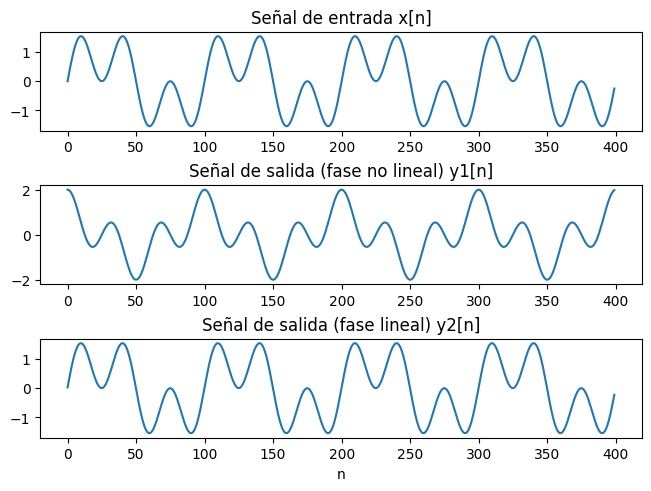

In [ ]:
#Ejemplo 2.2.1. Distorsión por fase
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Omega1 = np.pi/50
Omega2 = 3*np.pi/50
n = np.arange(0,400)

#Señal de entrada
x = np.sin(Omega1*n) + np.sin(Omega2*n)

#Señal de salida si el desplazamiento de fase es igual para ambas componentes (fase no lineal)
y1 = np.sin(Omega1*n + np.pi/2) + np.sin(Omega2*n + np.pi/2)

#Señal de salida si el desplazamiento de fase es lineal, es decir fase = c*Omega
c = 0.1
y2 = np.sin(Omega1*n + c*Omega1) + np.sin(Omega2*n + c*Omega2)

#Grafica las señales en el tiempo
fig, axs = plt.subplots(3,1,layout='constrained')
axs[0].plot(x)
axs[0].set_title('Señal de entrada x[n]')
axs[1].plot(y1)
axs[1].set_title('Señal de salida (fase no lineal) y1[n]')
axs[2].plot(y2)
axs[2].set_title('Señal de salida (fase lineal) y2[n]')
axs[2].set_xlabel('n')
plt.show()

## 2.3 Respuesta al Impulso de los Filtros Ideales

Todos los sistemas reales tienen respuestas en frecuencia simétricas, por lo tanto, la respuesta en frecuencia de un filtro **pasa-bajo** ideal luce  se muestra en la siguiente figura.  

![Filtro pasa-bajo ideal](../img/cap2_filtroLP.png)

Para calcular la respuesta al impulso del filtro podemos notar que $H(\Omega)$ está definida mediante la expresión:

$$H(\Omega)=\left\{ \begin{matrix}
1 & -\Omega_{c}\leq\Omega\leq\Omega_{c}\\
0 & c.c.
\end{matrix} \right. $$


Así que, para encontrar $h[n]$, basta con calcular la transformada inversa de Fourier de la expresión anterior:

$$h[n]=\frac{1}{2\pi}\int_{-\Omega_{c}}^{\Omega_{c}}exp(-j\Omega n)d\Omega 

\Rightarrow h[n]=\frac{1}{n\pi}sen(n\Omega_{c})=\frac{\Omega_{c}}{\pi}sinc\left(\frac{n\Omega_{c}}{\pi}\right)$$

donde $sinc(x)=\frac{sen(\pi x)}{\pi x}$.

Nótese que esta ecuación de $h[n]$ está definida para todo el rango de $n$, es decir, es de longitud infinita. Este comportamiento es típico de todos los filtros digitales ideales. En la siguiente sección se mostrará como recortar $h[n]$ para ser usada en un filtro FIR.

Las respuestas al impulso de los filtro pasa-alto y pasa-banda no difieren mucho de esta forma funcional. Para derivar las formas de $h[n]$ de estos filtros se usan las propiedades de desplazamiento en frecuencia y modulación de la transformada de Fourier como se muestra a continuación. 

![Conversión pasa-bajo a otros filtros](../img/cap2_LPtoHP_BP.png)

En la figura puede notarse que la respuesta en frecuencia de un filtro **pasa-alto**, $H_{HP}(\Omega)$, no es más que la respuesta en frecuencia de un filtro pasa-bajo $H_{LP}(\Omega)$ donde se ha desplazado el cero hasta la frecuencia $\Omega=\pi$:

$$H_{HP}(\Omega)=H_{LP}(\Omega-\pi)$$

y nótese que la frecuencia de corte del filtro pasa-alto

$$\Omega_{HP}=\pi-\Omega_{LP}$$

Algo similar se hace para convertir un filtro pasa-bajo a **pasa-banda**. En este caso, se debe desplazar el punto de frecuencia cero del filtro pasa-bajo a la frecuencia central $\Omega_{0}$ del filtro pasa-banda. El ancho de banda del nuevo filtro será el doble de la frecuencia de corte del filtro pasa-bajo

$$\Omega_{BW}=2\Omega_{LP}$$

Estos desplazamientos en frecuencia se pueden realizar multiplicando la respuesta al impulso del filtro pasa-bajo ideal por una función $cos(n\pi)$, en el caso del pasa-alto, y $cos(n\Omega_{0})$, para el pasa-banda, como se muestra en la siguiente tabla. Debido a este comportamiento, podemos afirmar que un filtro pasa-alto es un caso particular de filtro pasa-banda cuya frecuencia central es $\pi$.

|Tipo de filtro| Respuesta al impulso $h[n]$ |
|------|------|
|Pasa-bajo|$h[n]=\frac{\Omega_{c}}{\pi}sinc\left(\frac{n\Omega_{c}}{\pi}\right)$|
|Pasa-alto|$h[n]=\frac{\pi-\Omega_{HP}}{\pi}sinc\left(\frac{n(\pi-\Omega_{HP})}{\pi}\right)cos(n\pi)$|
|Pasa-banda|$h[n]=\frac{\Omega_{BW}}{\pi}sinc\left(\frac{n \Omega_{BW} }{2\pi}\right)cos(n\Omega_{0})$|

Los filtros **rechaza-banda** se construyen comúnmente como la suma de un filtro pasa-bajos y un filtro pasa-altos, sin embargo, si analizamos con detenimiento el espectro de dicho filtro, se podría decir que un filtro rechaza-banda es el “inverso” de un filtro pasa-banda, pues su relación de espectros es igual a $$H_{notch}(\Omega)=1-H_{BP}(\Omega)$$

Tomando la transformada inversa de Fourier a la ecuación anterior, tenemos que: 

$$h_{notch}[n]=\delta[n]-h_{BP}[n]=\delta[n]-2\,h_{LP}[n]\,\,cos(n\Omega_{0})$$ 

donde, $\Omega_{0}$ es la frecuencia central del filtro rechaza-banda, y $h_{LP}[n]$ es la respuesta al impulso de un filtro pasa-bajo con una frecuencia de corte igual a la mitad del ancho de banda del filtro rechaza-banda.

## 2.4 Métodos de Diseño de h[n]


### 2.4.1 Truncamiento o Enventanamiento

El diseño de un filtro FIR por el método de enventanamiento consiste en obtener los coeficientes $b_{k}$ mediante el siguiente procedimiento:

1. Diseño de la respuesta en frecuencia del filtro $H_{D}(\Omega)$. 

2. Cálculo de la respuesta al impulso ideal del sistema $h_{d}[n]$. Para ello se emplea la transformada inversa de Fourier de la respuesta en frecuencia deseada $H_{D}(\Omega)$.

3. Obtención de la versión causal de $h[n]$: $h_{c}[n]=h_{d}\left[n-\frac{N_{h}-1}{2}\right]$.

4. Truncamiento de $h_{c}[n]$ usando alguna ventana $w[n]$: $$h_{w}[n]=h_{c}[n]w[n]$$

El truncamiento es necesario, ya que la respuesta al impulso de la mayoría de los sistemas ideales tiene una longitud infinita y un filtro FIR requiere limitar $h[n]$ a $N_{h}$ muestras.

Enventanar consiste en multiplicar la respuesta al impulso por una función que limita su ancho. Como esta operación se realiza en el dominio del tiempo, esto se verá reflejado en el dominio de la frecuencia como una convolución $$H_{w}(\Omega)=H_{D}(\Omega)\star W(\Omega)$$

La ventana más simple es la ventana rectangular, cuya respuesta en frecuencia es una $sinc$, por lo tanto, al enventanar un filtro ideal con una ventana rectangular hará que la respuesta en frecuencia del filtro modificado sea muy parecida a una $sinc$. Aumentando el tamaño de la ventana, $N_{h}$, se espera que la respuesta del filtro diseñado sea más cercana al filtro ideal. Este hecho se puede comprobar en la siguiente animación, donde aumentar $N_h$ hace que la respuesta en frecuencia se aproxime a la ideal, pero aparece un rizado en la banda de paso y la banda de atenuación, efecto conocido como _Gibbs_, que se hace más evidente al graficar la respuesta en frecuencia en decibeles. De clic en ▷ para iniciar la animación y cambie el valor de $N_h$.

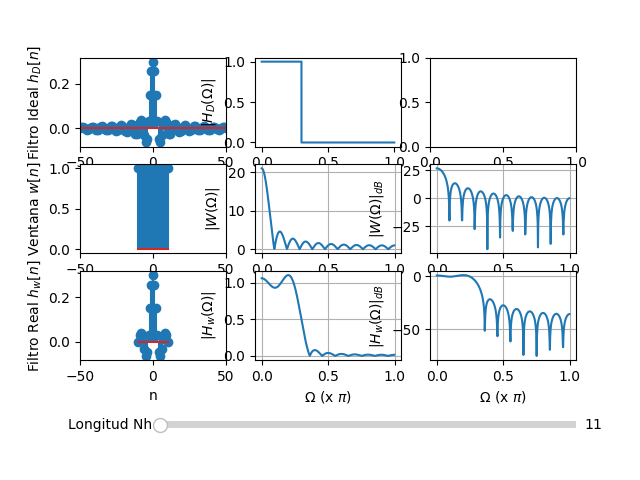

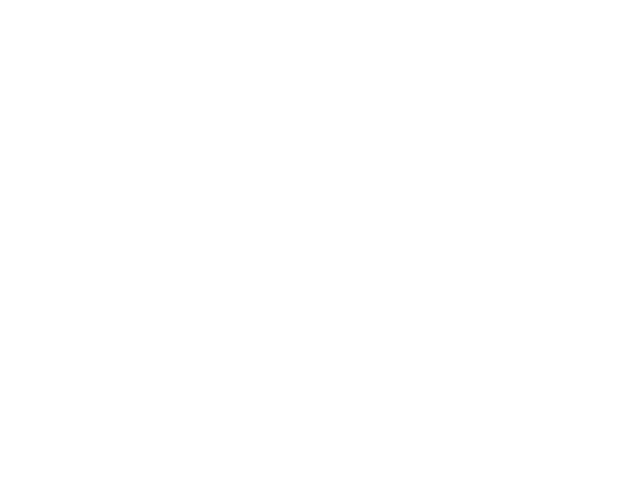

In [1]:
#Efecto de usar diferentes longitudes Nh de la ventaja rectangular para truncar la respuesta al impulso de un filtro pasa-bajo ideal.
%matplotlib widget
%run cap2_window_anim.py

De la animación puede notarse que al aumentar $N_{h}$, se reduce la caída del ancho del lóbulo principal (mejora selectividad), y aparecerán más lóbulos laterales en la banda de atenuación. Sin embargo, la altura de los lóbulos secundarios permanece sin alterarse al aumentar $N_{h}$.

Los lóbulos laterales pueden reducirse empleando una ventana que no tenga terminaciones abruptas como la ventana rectangular. En siguiente tabla se presentan las diferentes ventanas disponibles en Python para mejorar la respuesta en frecuencia, cuyas formas y respuestas en frecuencia se muestran en el siguiente código. Puede consultar en la documentación de NumPy las expresiones matemáticas de cada ventana.

|Nombre de la Ventana | Comando Python |
|------|------|
|Rectangular| No aplica. Implícita al evaluar en un rango de n |
|Bartlett (triangular)|	 ``np.bartlett(Nh)`` |
|Blackman | ``np.blackman(Nh)`` |
|Hamming |  ``np.hamming(Nh)`` |
|Hanning | ``np.hanning(Nh)`` |
|Kaiser | ``np.kaiser(Nh, beta)`` |

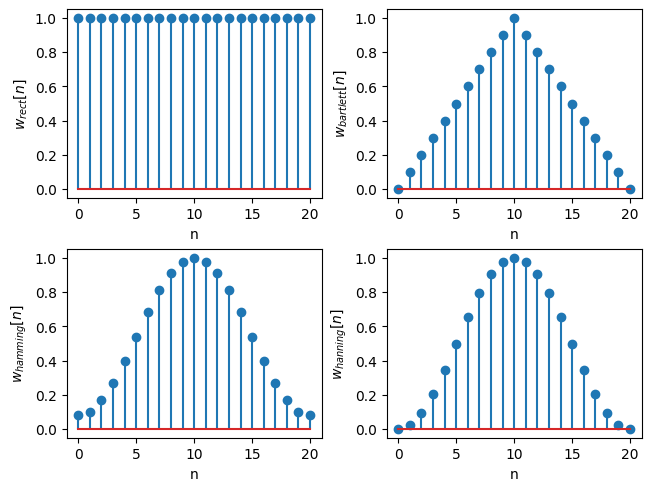

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15448\4987267.py:33: RuntimeWarning: divide by zero encountered in log10
  axs.plot(w/np.pi, 20*np.log10(np.abs(Ww/Ww[0])), 'g-', label='Hanning')


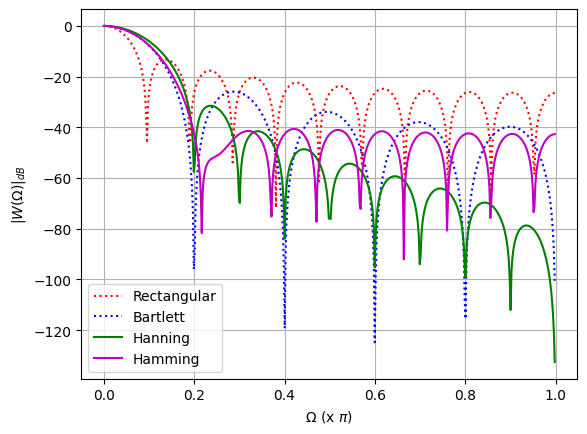

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
# Crea las ventanas
Nh = 21
wrect = np.ones(Nh)
wbart = np.bartlett(Nh)
whanning = np.hanning(Nh)
whamming = np.hamming(Nh)

#Grafica las ventanas y sus respuestas en frecuencia
fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')
axs[0,0].stem(wrect)
axs[0,0].set_ylabel(r'$w_{rect}[n]$')
axs[0,0].set_xlabel('n')
axs[0,1].stem(wbart)
axs[0,1].set_ylabel(r'$w_{bartlett}[n]$')
axs[0,1].set_xlabel('n')
axs[1,0].stem(whamming)
axs[1,0].set_ylabel(r'$w_{hamming}[n]$')
axs[1,0].set_xlabel('n')
axs[1,1].stem(whanning)
axs[1,1].set_ylabel(r'$w_{hanning}[n]$')
axs[1,1].set_xlabel('n')
plt.show()

fig, axs = plt.subplots()
w, Ww = sig.freqz(wrect)
axs.plot(w/np.pi, 20*np.log10(np.abs(Ww/Ww[0])), 'r:', label='Rectangular')
w, Ww = sig.freqz(wbart)
axs.plot(w/np.pi, 20*np.log10(np.abs(Ww/Ww[0])), 'b:', label='Bartlett')
w, Ww = sig.freqz(whanning)
axs.plot(w/np.pi, 20*np.log10(np.abs(Ww/Ww[0])), 'g-', label='Hanning')
w, Ww = sig.freqz(whamming)
axs.plot(w/np.pi, 20*np.log10(np.abs(Ww/Ww[0])), 'm-', label='Hamming')
axs.set_ylabel(r'$|W(\Omega)|_{dB}$')
axs.set_xlabel(r'$\Omega$ (x $\pi$)')
axs.grid()
axs.legend()
plt.show()

Puede observarse que las ventanas de Hanning y Hamming ofrecen un mejor desempeño en frecuencia que la rectangular y la de Bartlett, sin embargo, la ventana de Hamming posee una menor altura del lóbulo secundario que la Hanning, así mismo su nivel de rizado permanece constante a medida que la frecuencia aumenta, a diferencia de la Hanning, en la cual el nivel de atenuación aumenta con la frecuencia.

Por su parte, la ventana de **Kaiser**, no mostrada en la figura anterior, posee dos parámetros independientes ($N_h$ y $\beta$) que permiten controlar el ancho de la banda de transición ($\Delta$) y el rizado de las bandas de paso y de atenuación ($\delta$) que se muestran en la siguiente figura. 

![Parámetros del filtro de Kaiser](../img/cap2_kaiser.png)

El nivel de rizado deseado, $\delta$, generalmente se expresa en términos de decibles: $$A=-20\log_{10}(\delta)$$ y el parámetro $\beta$  puede encontrarse mediante las siguientes fórmulas empíricas:

$$\beta=0.1102(A-8.7)\qquad  si ~ A\geq50 \\

\beta=0.5842(A-21)^{0.4}+0.07886(A-21)\qquad  si ~ 21<A<50 \\

\beta=0\qquad  si ~ A\leq21$$

$\Delta$ se especifica en fracciones de la frecuencia de muestreo $f_{s}$ y está determinado por la longitud del filtro $$N_{h}\geq\frac{A-7.95}{28.72\Delta}$$

Puesto que $N_{h}$ depende del nivel de rizado $A$, no todos los niveles de rizado son posibles de implementar con una ventana de Kaiser.  

Sí el valor de $\beta=0$, la ventana de Kaiser será la misma ventana rectangular. Sí $\beta=5.414$, esta ventana se aproxima a la ventana de Hamming. Al aumentar $\beta$, el lóbulo principal se hace más ancho y los lóbulos laterales más pequeños.


#### Ejemplo 2.4.1. Diseño de un filtro por enventanamiento

El transductor de cierto sistema de instrumentación entrega una señal cuya máxima componente de frecuencia es de 500Hz. Esta señal está fuertemente contaminada por la red eléctrica (60Hz). Diseñe un filtro digital de fase lineal que permita eliminar las componentes de frecuencia de la red.


##### Solución

Puesto que la máxima componente de frecuencia de la señal a filtrar es $f_{max}=500Hz$, elegiremos según el teorema del muestreo, una $$f_{s}=2f_{max}=1kHz$$

El filtro solicitado será un atrapa-banda, con frecuencia central $f_{0}=60Hz$. Para obtener la respuesta al impulso del filtro atrapa-banda tenemos dos opciones: 1) sumar un pasa-bajo y un pasa-alto; o 2) usar la expresión indicada en la Sección 2.4 donde se obtiene el filtro a partir del modelo de un pasa-banda. En este ejemplo, optaremos por la primera opción, en este caso, el filtro pasa-bajo tendrá frecuencia de corte $f_{LP}=55Hz$, y el pasa-alto, una frecuencia de corte $f_{HP}=65Hz$. El ancho de banda fue elegido arbitrariamente para esta solución. La respuesta al impulso ideal y no causal del filtro resultante será la suma de ambas respuestas al impulso:

$$h_{D}[n]=h_{LP}[n]+h_{HP}[n]=\frac{\Omega_{LP}}{\pi} sinc \left( \frac{n\Omega_{LP}}{\pi} \right) + \frac{\pi-\Omega_{HP}}{\pi} sinc\left(\frac{n(\pi-\Omega_{HP})}{\pi} \right) cos(\pi n)$$

 donde $\Omega_{LP}=2\pi\frac{55}{1000}=0.11\pi$, $\Omega_{HP}=2\pi\frac{65}{1000}=0.13\pi$.

Con estas ecuaciones, procederemos en Python a enventanar la secuencia $h_{D}[n]$ con una ventana de Hamming, asumiendo un ancho de la ventana de $N_{h}=151$. Note que en el código en Python, para crear una respuesta al impulso causal basta con evaluar $n$ en el rango $[-(N_h-1)/2, (N_h-1)/2]$.

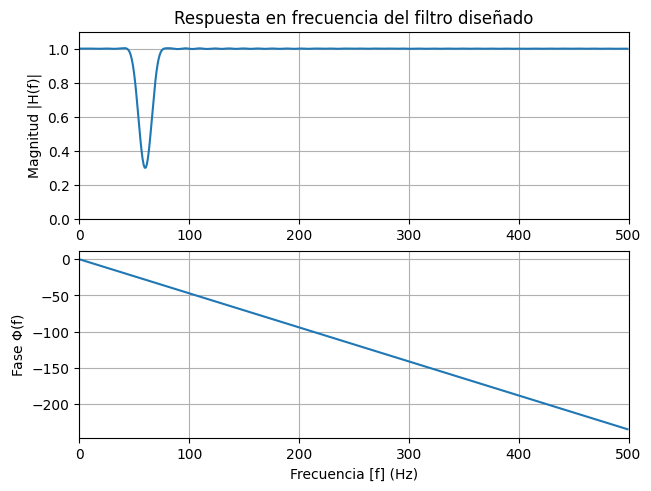

In [12]:
#Ejemplo 2.4.1. Filtro rechaza-banda usando el método de enventanamiento
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

#Parámetros del filtro
fs = 1000
fLP = 55
fHP = 65
Omega1 = 2*np.pi*fLP/fs
Omega2 = 2*np.pi*fHP/fs
Nh = 151

#Cálculo de la respuesta al impulso 
n = np.arange(-(Nh-1)/2, (Nh-1)/2 + 1)
hLP = (Omega1/np.pi) * np.sinc(n*(Omega1/np.pi))
hHP = ((np.pi-Omega2)/np.pi) * np.sinc(n*((np.pi-Omega2)/np.pi)) * np.cos(np.pi * n)
hD = hLP + hHP

#Enventana la respuesta al impulso
hw = hD * np.hamming(Nh)

#Grafica la respuesta en frecuencia en Hertz
w, Hw = sig.freqz(hw)
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot((fs/2) * w/np.pi, np.abs(Hw))
axs[0].set_ylabel(r'Magnitud |H(f)|')
axs[0].set_title('Respuesta en frecuencia del filtro diseñado')
axs[0].set(xlim=(0,fs/2), ylim=(0,1.1))
axs[0].grid()
axs[1].plot((fs/2) * w/np.pi, np.unwrap(np.angle(Hw)))
axs[1].set_xlabel(r'Frecuencia [f] (Hz)')
axs[1].set_ylabel(r'Fase $\Phi$(f)')
axs[1].set(xlim=(0,fs/2))
axs[1].grid()
plt.show()

##### Para reflexionar

1. Si en el ejemplo anterior no se suman las respuestas al impulso de los filtros pasa-bajo y pasa-banda, sino que se hace la convolución entre ellas, $h_{d}[n]=h_{LP}[n]\star h_{HP}[n]$, es decir, se conectan los filtros en serie, ¿cómo será la respuesta en frecuencia del sistema?. Recuerde que el comando en Python para hacerlo es ``sig.convolve``.

2. Si $f_{LP}=65Hz$ y $f_{HP}=55Hz$, ¿cómo será la respuesta en frecuencia $H(\Omega)$ si se conectan los filtros en paralelo (se suman las respuestas al impulso) y en serie (se convolucionan las respuestas al impulso)? 

Puede probar sus soluciones modificando el código en Python indicado anteriormente.


#### Ejemplo 2.4.2. Diseño de un filtro con ventana de Kaiser

Repita el mismo diseño del punto anterior pero asuma un rizado en la bandas de 0.05% y un ancho de la banda de transición de 2Hz. 


##### Solución


La única diferencia con el ejemplo anterior está en el tipo de ventana a usar. La ventana de Hamming tiene un nivel de rizado fijo y un ancho de la banda de transición que depende de $N_h$, por lo que resulta más conveniente para este problema es emplear una ventana de Kaiser en la cual ambos parámetros se pueden controlar. Según la especificación, $\delta=0.0005$ o equivalentemente $A=-20log_{10}(0.0005)=66dB$. Usando la fórmula empírica para el caso $A>50$:

$$\beta=0.1102(A-8.7)=6.3144$$ 

y para $N_{h}$, tomaremos $\Delta=2Hz/fs=0.002$, por lo tanto:

$$N_{h} \geq \frac{A-7.95}{28.72\Delta}=1010$$

El programa en Python que calcula la respuesta al impulso se muestra a continuación. Notándose que el filtro es más selectivo que el Ejemplo 2.4.1. Nótese que la longitud de $N_{h}$ usada en el código es 1011 (número impar), esto con el fin de garantizar de manera más simple simetría en la respuesta al impulso que condujera a una fase lineal. 

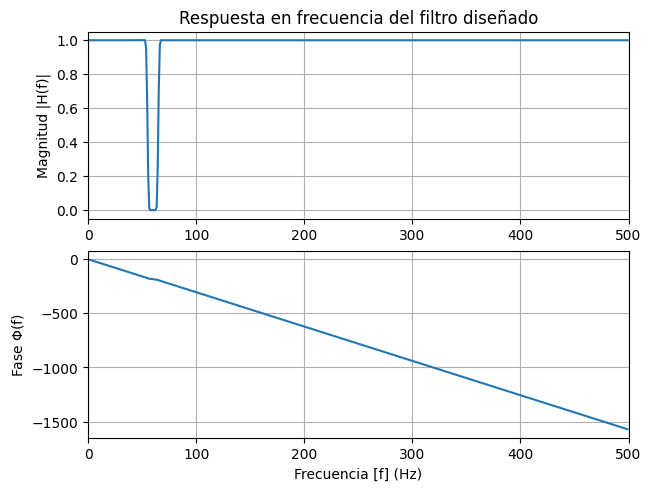

In [3]:
#Ejemplo 2.4.2. Filtro rechaza-banda con ventana de Kaiser
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

#Parámetros del filtro
fs=1000
fLP = 55
fHP = 65
Omega1 = 2*np.pi*fLP/fs
Omega2 = 2*np.pi*fHP/fs
beta = 6.3144
Nh = 1011

#Cálculo de la respuesta al impulso 
n = np.arange(-(Nh-1)/2, (Nh-1)/2 + 1)
hLP = (Omega1/np.pi) * np.sinc(n*(Omega1/np.pi))
hHP = ((np.pi-Omega2)/np.pi) * np.sinc(n*((np.pi-Omega2)/np.pi)) * np.cos(np.pi * n)
hD = hLP + hHP

#Enventana la respuesta al impulso
hw = hD * np.kaiser(Nh, beta)

#Grafica la respuesta en frecuencia en Hertz
w, Hw = sig.freqz(hw)
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot((fs/2) * w/np.pi, np.abs(Hw))
axs[0].set_ylabel(r'Magnitud |H(f)|')
axs[0].set_title('Respuesta en frecuencia del filtro diseñado')
axs[0].set(xlim=(0,fs/2))
axs[0].grid()
axs[1].plot((fs/2) * w/np.pi, np.unwrap(np.angle(Hw)))
axs[1].set_xlabel(r'Frecuencia [f] (Hz)')
axs[1].set_ylabel(r'Fase $\Phi$(f)')
axs[1].set(xlim=(0,fs/2))
axs[1].grid()
plt.show()

##### Para Reflexionar

En el ejemplo anterior se asumió una longitud impar de $N_{h}=1011$ para facilitar la generación de una respuesta al impulso con simetría impar, pero el cálculo dio $N_{h}=1010$. ¿Cómo tendría que modificar el programa para obtener una longitud par de la respuesta al impulso ($N_{h}=1010$) y garantizar una fase lineal?


### 2.4.2 Método de Muestreo en Frecuencia


Con el método del enventanamiento, $h[n]$ se obtiene evaluando la transformada inversa de Fourier, la cual no siempre es posible calcular para filtros cuya respuesta en frecuencia no puede ser modelada por un filtro estándar ideal. En estos casos, se debe emplear un método alternativo como lo es el **muestreo en frecuencia**. 

El método de muestreo en frecuencia consiste en tomar $N_{h}$ muestras equiespaciadas de la respuesta en frecuencia ideal, en otras palabras, partir de la especificación en frecuencia no en términos de la transformada de Fourier $H(\Omega)$ sino de su transformada discreta de Fourier (DFT). El conjunto de muestras que constituyen la DFT se puede expresar como:

$$H_{R}[k]=H_{D}(\Omega)\left|_{\Omega=\Omega_{k}=\frac{2\pi}{N_{h}}k}\right.\qquad k=0,...,N_{h}-1$$ 

y con el fin de garantizar una respuesta lineal de la fase, se parte del hecho que la función de transferencia del filtro a muestrear es simétrica alrededor de $\Omega=0$. 

Debido a que necesitamos una respuesta al impulso causal, es necesario desplazarla $\frac{N_{h}-1}{2}$ muestras en el tiempo, lo que equivale en la frecuencia, usando la propiedad de desplazamiento en el tiempo de la DFT, a:

$$H[k]=H_{R}[k]e^{-j\frac{N_{h}-1}{2}\frac{2\pi}{N_{h}}k}$$

Puesto que el término $\frac{N_{h}-1}{2}$ debe ser un número entero, la expresión anterior solamente es válida si $N_{h}$ es impar. Si $N_{h}$ es par, la versión causal de $H[k]$ debe ser:

$$H[k]=H_{R}[k]e^{-j\frac{N_{h}}{2}\frac{2\pi}{N_{h}}k}=(-1)^{k}H_{R}[k]$$

Por último, la respuesta al impulso se obtiene por medio de la transformada discreta de Fourier inversa (IDFT):

$$h[n]=\frac{1}{N_{h}}\sum_{k=0}^{N_{h}-1}H[k]\exp\left(j2\pi\frac{kn}{N_{h}}\right)$$

Cuando se enventana una secuencia, se introduce una desviación entre la respuesta en frecuencia del filtro deseada y la obtenida, apareciendo un rizado en las bandas. Con el método de muestreo en frecuencia se consigue una desviación de cero entre la respuesta en frecuencia deseada, $H_{D}(\Omega)$, y la diseñada, $H[k]$, únicamente en las frecuencias $\Omega_{k}$, pero en la región de frecuencias intermedias se presentará un rizado que nunca puede ser eliminado. Este rizado es propio de los filtros FIR y aparece como consecuencia de que su función de transferencia está completamente gobernada por ceros como se mostrará en el siguiente ejemplo.

#### Ejemplo 2.4.3. 

Diseñar un filtro digital pasa-banda de longitud $N_{h}=31$ que tenga la respuesta en frecuencia indicada en la Figura. Se asume que el filtro es real, por lo que la región de frecuencias negativas es simétrica.

![Respuesta en frecuencia del ejemplo de muestreo en frecuencia](../img/cap2_ex_samp_freq.png)



##### Solución

Para obtener un filtro digital real y de fase lineal es necesario asumir que la magnitud de la respuesta en frecuencia tiene simetría par. Bajo esta suposición y asumiendo que el espectro indicado en la figura se puede modelar mediante una expresión cuadrática, tenemos que $H(\Omega)$ adquiere la forma: 

$H_{R}(\Omega)=\left\{ \begin{array}{cc}
1-a(\Omega-\Omega_{0})^{2} & 0\leq\Omega<0.6\pi\\
0 & 0.6\pi\leq\Omega<\pi\\
H(2\pi-\Omega) & \pi\leq\Omega<2\pi
\end{array}\right.$

En esta ecuación, $\Omega_{0}=0.3\pi$ y para determinar $a$ tenemos que $H(0)=1-a(0-\Omega_{0})^{2}=0$, lo que implica que $a=1/\Omega_{0}^{2}$. 

Nótese que obtener una ecuación analítica de $h[n]$ empleando la integral de la transformada inversa de Fourier no es una tarea trivial, de allí la utilidad de este método. 

Con esta ecuación se puede escribir en Python un programa que calcule $H_R[k]$, obtenga la versión causal $H[k]$, y calcule la IDFT a través de una transformada rápida inversa de Fourier (IFFT) como se muestra a continuación. 

Note que en el código, para la región de frecuencia $\pi\leq\Omega<2\pi$ se hace una reflexión con el comando ``np.flip`` tomando los elementos de índices $k=1...N_{h}-1$. Esto se hace así porque el elemento en la posición $k=0$ no puede reflejarse al final del arreglo, ya que es la frecuencia 0.

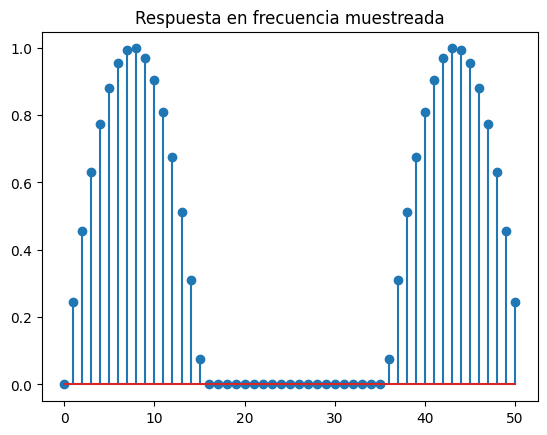

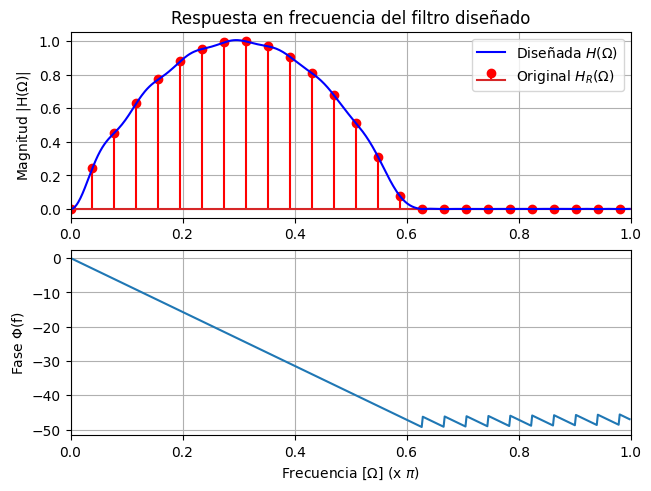

In [4]:
#Ejemplo 2.4.3. Filtro rechaza-banda con ventana de Kaiser
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from scipy.fft import ifft

#Especificación del filtro
Nh = 51
Omega0 = 0.3*np.pi
a = 1/np.power(Omega0,2)

#Crea la DFT de la respuesta en frecuencia
Hr = np.zeros(Nh)
for k in range(0, Nh):
    Omega = 2*np.pi*k/Nh
    if (Omega<0.6*np.pi):
        Hr[k] = 1-a*np.power(Omega-Omega0,2)
Hr = Hr + np.concatenate( (np.zeros(1), np.flip(Hr[1:])) ) 

plt.stem(Hr)
plt.title('Respuesta en frecuencia muestreada')

#Calcula la versión3 causal de Hr 
H = Hr * np.exp( -1j * ((Nh-1)/Nh)*np.pi * np.arange(0,Nh) )

#Calcula h[n] 
hn = np.real(ifft(H))

#Verifica las respuestas en frecuencia
w, Hw = sig.freqz(hn)
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].stem(2*np.arange(0,Nh)/Nh, Hr, 'r-', label=r'Original $H_{R}(\Omega)$')
axs[0].plot(w/np.pi, np.abs(Hw), 'b-', label=r'Diseñada $H(\Omega)$')
axs[0].set_ylabel(r'Magnitud |H($\Omega$)|')
axs[0].set_title('Respuesta en frecuencia del filtro diseñado')
axs[0].set(xlim=(0,1))
axs[0].grid()
axs[0].legend()
axs[1].plot(w/np.pi, np.unwrap(np.angle(Hw)))
axs[1].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[1].set_ylabel(r'Fase $\Phi$(f)')
axs[1].set(xlim=(0,1))
axs[1].grid()
plt.show()

### 2.4.3 Filtros Óptimos

Las técnicas de diseño de filtros FIR descritas anteriormente tienen el inconveniente de que no existe un control preciso de las frecuencias de la banda de transición así como del nivel de rizado en las bandas de paso y de rechazo. Al incrementar el tamaño del filtro, la respuesta obtenida $H_{A}$ se asemeja más a la respuesta deseada $H_{D}$, sin embargo, existe una mayor desviación de la respuesta para frecuencias más cercanas a la banda de transición (Véase por ejemplo la animación de la Sección 2.4.1). Si el error se distribuyera más uniformemente a lo largo de todo el eje de frecuencia $0<\Omega<\pi$, el filtro podría ser más selectivo y se tendría un mejor control del rizado y ancho de la banda de transición, para ello, los filtros óptimos pretenden ser la solución.

El método consiste en asumir que tanto para la banda de paso, como la de transición, existe un rizado constante, el cual presenta máximos y mínimos para ciertos valores de frecuencia. Así mismo, supone que la respuesta al impulso es simétrica y par, es decir, $b_{k}=b_{-k}$, con el fin de garantizar una fase lineal. Esto permite expresar la respuesta en frecuencia como:

$$\left|H_{A}(\Omega)\right|=\left|\sum_{k=-(N_{h}-1)/2}^{(N_{h}-1)/2}b_{k}\exp(-jk\Omega)\right|=\left|b_{0}+2\sum_{k=1}^{\frac{N_{h}-1}{2}}b_{k}\cos\left(k\Omega\right)\right|=\sum_{k=0}^{\frac{N_{h}-1}{2}}c_{k}\cos(k\Omega)$$

Donde los coeficientes $c_{k}$ están relacionados con los coeficientes $b_{k}$ de la respuesta al impulso. Si diferenciamos e igualamos a cero la expresión anterior, obtenemos que $H_{A}(\Omega)$ presenta 2 extremos en $\Omega=0$ y $\Omega=\pi$, sin embargo, en el rango de $0<\Omega<\pi$, existirán otros máximos y mínimos alternados los cuales no están equiespaciados.

Los coeficientes $c_{k}$ no pueden obtenerse por medio de un método analítico, en su lugar se emplea un algoritmo iterativo que minimiza la función de error:

$$E(\Omega)=W(\Omega)[H_{D}(\Omega)-H_{A}(\Omega)]$$

donde $H_{D}(\Omega)$ es la respuesta en frecuencia deseada y $W(\Omega)$ es la función de ponderación de error, tomada habitualmente como: $W(\Omega)=\frac{\delta_{2}}{\delta_{1}}$ para $\Omega$ en la banda de paso, y $W(\Omega)=0$ en la banda de rechazo, siendo $\delta_{1}$ y $\delta_{2}$ los niveles de rizado en la banda de paso y rechazo, respectivamente.

Los métodos más empleados para minimizar $E(\Omega)$, son el propuesto por Park y McClellan (implementado en Python como ``sig.firls``), y el Remez (en Python ``sig.remez``), cuyas descripciones no se abordan en este documento.

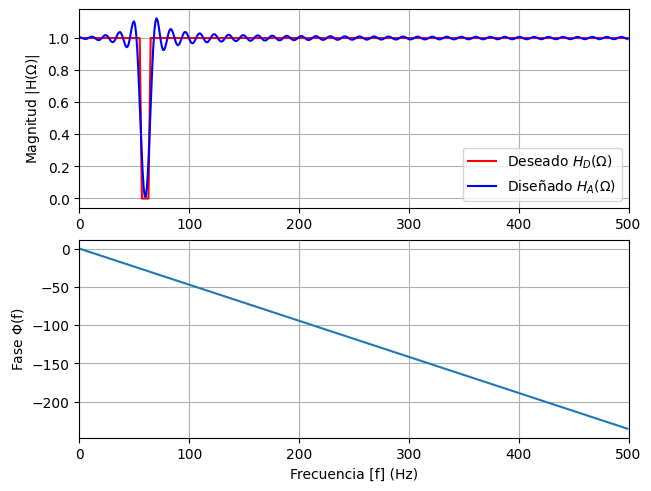

In [6]:
#Ejemplo 2.4.4. Cálculo de la respuesta al impulso del Ejemplo 2.4.1 usando filtros óptimos
# Especificación:
# fs = 1000Hz
# Pasa-bajo de 0...55Hz y Pasa-alto 65Hz a 500Hz
# Ancho de la banda de transición: 2Hz
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

#Crea los vectores con la especificación de frecuencias y ganancias hD en dichas frecuencias
fs = 1000
f = [0, 55, 57, 63, 65, 500]
hD = [1, 1, 0, 0, 1, 1]
Nh = 151
hA = sig.firls(Nh, f, hD, fs=fs)

#Verifica las respuestas en frecuencia
w, Hw = sig.freqz(hA)
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(f,hD,'r-', label=r'Deseado $H_{D}(\Omega)$')
axs[0].plot((fs/2) * w/np.pi, np.abs(Hw), 'b-', label=r'Diseñado $H_{A}(\Omega)$')
axs[0].set_ylabel(r'Magnitud |H($\Omega$)|')
axs[0].set(xlim=(0,fs/2))
axs[0].grid()
axs[0].legend()
axs[1].plot((fs/2) * w/np.pi, np.unwrap(np.angle(Hw)))
axs[1].set_xlabel(r'Frecuencia [f] (Hz)')
axs[1].set_ylabel(r'Fase $\Phi$(f)')
axs[1].set(xlim=(0,fs/2))
axs[1].grid()
plt.show()

## 2.5 Filtros Especiales


### 2.5.1 Diferenciadores Digitales

El caso más simple de diferenciador digital es el diferenciador de primer orden, definido mediante la ecuación en diferencias:

$$y[n]=x[n]-x[n-1]$$

Cuya respectiva respuesta en frecuencia está dada por

$$H(\Omega)=\frac{Y(\Omega)}{X(\Omega)}=1-exp(-j\Omega)$$

con un espectro de magnitud

$$|H(\Omega)|=2sen\left(\frac{\Omega}{2}\right)$$

Este diferenciador tiene una respuesta en frecuencia muy pobre a alta frecuencia, como se verá en el siguiente ejemplo. 

Para obtener un diferenciador más exacto, en lugar de usar la ecuación en diferencias $y[n]=x[n]-x[n-1]$ se prefiere calcular la respuesta al impulso de un derivador ideal y enventanarla como se estudio anteriormente. De esta forma, partiendo de la respuesta en frecuencia de un diferenciador ideal:

$$H_{dif-ideal}(\Omega)=j\Omega$$ 

Se encuentra, mediante la transformada inversa de Fourier, que la respuesta al impulso de un diferenciador ideal es:

$$h_{dif-ideal}[n]=\frac{cos(n\pi)}{n}=\left\{ \begin{array}{c}
\frac{1}{n}\\
-\frac{1}{n}\\
0
\end{array}\begin{array}{c}
n\,par\\
n\,impar\\
n=0
\end{array}\right.$$

En el siguiente ejemplo se muestra el diseño de un diferenciador con los métodos de enventanamiento y filtros óptimos. Los diferenciadores digitales pueden diseñarse también por medio del método de muestreo en frecuencia, sin embargo, no es muy recomendable, ya que aparece bastante rizado en la respuesta en frecuencia. 

Nótese del ejemplo, que únicamente para valores pequeños de $\Omega$ existe una gran coincidencia entre el diferenciador ideal y el de primer orden. Esta característica se conserva para los diferenciadores de órdenes superiores, pero en éstos el ancho de banda, hasta el cual el diferenciador se comporta de manera ideal, es mucho mayor. Además, emplear ventana de Hamming mejora significativamente la respuesta en frecuencia del diferenciador. Por otra parte, el diferenciador generado con el método de filtros óptimos ofrece un desempeño similar al diferenciador ideal.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15448\298133977.py:12: RuntimeWarning: divide by zero encountered in divide
  h_difN = np.cos(n*np.pi)/n


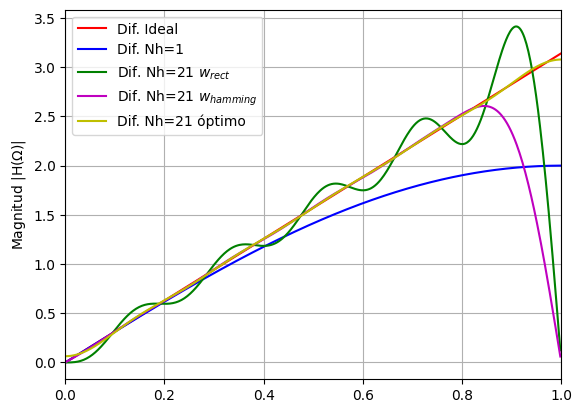

In [7]:
#Ejemplo 2.5.1. Diseño de un diferenciador de orden Nh
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

#diferenciador de primer orden
h_dif1 = [1, -1]

#diferenciador de orden Nh sin enventanamiento (ventana rectangular)
Nh = 21
n = np.arange(-(Nh-1)/2,(Nh-1)/2 + 1)
h_difN = np.cos(n*np.pi)/n
h_difN[int((Nh-1)/2)] = 0

#diferenciador de orden Nh enventanado
h_difNw = h_difN * np.hamming(Nh)

#diferenciador con filtros óptimos
h_difopt = sig.firls(Nh, [0 ,1], [0, np.pi])

#grafica respuestas en frecuencia
fig, axs = plt.subplots()
axs.plot([0, 1],[0, np.pi], 'r-', label=r'Dif. Ideal')
w, Hw = sig.freqz(h_dif1)
axs.plot(w/np.pi, np.abs(Hw), 'b-', label=r'Dif. Nh=1')
w, Hw = sig.freqz(h_difN)
axs.plot(w/np.pi, np.abs(Hw), 'g-', label=r'Dif. Nh=21 $w_{rect}$')
w, Hw = sig.freqz(h_difNw)
axs.plot(w/np.pi, np.abs(Hw), 'm-', label=r'Dif. Nh=21 $w_{hamming}$')
w, Hw = sig.freqz(h_difopt)
axs.plot(w/np.pi, np.abs(Hw), 'y-', label=r'Dif. Nh=21 óptimo')
axs.set_ylabel(r'Magnitud |H($\Omega$)|')
axs.set(xlim=(0,1))
axs.grid()
axs.legend()
plt.show()

### 2.5.2 Transformador de Hilbert

El transformador de Hilbert es un filtro pasa-todo cuyo efecto sobre la señal de entrada consiste únicamente en desplazar la fase 90 grados para todas las frecuencias ($\Phi(\Omega)=\pi/2$), pero sin modificar la amplitud de las componentes de frecuencia ($|H(\Omega)|=1$). Su respuesta en frecuencia se define como: 

$$H(\Omega)=\left\{ \begin{array}{c}
-j\\
j
\end{array}\,\,\,\begin{array}{c}
0\leq\Omega\leq\pi\\
-\pi\leq\Omega<0
\end{array}\right.$$

por lo tanto, su respuesta al impulso ideal será:

$$h[n]=\frac{1}{n\pi}[1-cos(\pi n)]=\frac{2}{n\pi}sen^{2}(\frac{n\pi}{2})=\left\{ \begin{array}{c}
\frac{2}{n\pi}sen^{2}(\frac{n\pi}{2})\\
0
\end{array}\,\,\,\begin{array}{c}
n\neq0\\
n=0
\end{array}\right.$$

Al igual que el diferenciador, el transformador de Hilbert real tiene un ancho de banda comprendido entre $-\Omega_{L}\leq\Omega\leq\Omega_{H}$, donde $\Omega_{L}$ es muy cercano a cero y $\Omega_{H}$ a $\pi$, es decir, el transformador de Hilbert puede verse como un filtro pasa-banda de banda ancha. Este filtro puede diseñarse también por medio del método de muestreo en frecuencia y filtros óptimos, para este último método se toma la función de ponderación de error $W(\Omega)=1$ para la banda de paso.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15448\1200031181.py:9: RuntimeWarning: invalid value encountered in divide
  h_hilb = 2*np.power(np.sin(n*np.pi/2), 2) / (n*np.pi)


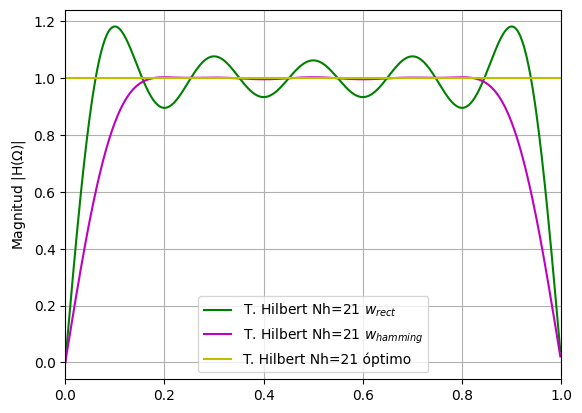

In [8]:
#Ejemplo 2.5.2. Diseño de un transformador de Hilbert
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

#Transformador de hilbert de orden Nh sin enventanamiento
Nh = 21
n = np.arange(-(Nh-1)/2,(Nh-1)/2 + 1)
h_hilb = 2*np.power(np.sin(n*np.pi/2), 2) / (n*np.pi)
h_hilb[int((Nh-1)/2)] = 0

#diferenciador de orden Nh enventanado
h_hilbw = h_hilb * np.hamming(Nh)

#diferenciador con filtros óptimos
h_hilbopt = sig.firls(Nh, [0 ,1], [1, 1])

#grafica respuestas en frecuencia
fig, axs = plt.subplots()
w, Hw = sig.freqz(h_hilb)
axs.plot(w/np.pi, np.abs(Hw), 'g-', label=r'T. Hilbert Nh=21 $w_{rect}$')
w, Hw = sig.freqz(h_hilbw)
axs.plot(w/np.pi, np.abs(Hw), 'm-', label=r'T. Hilbert Nh=21 $w_{hamming}$')
w, Hw = sig.freqz(h_hilbopt)
axs.plot(w/np.pi, np.abs(Hw), 'y-', label=r'T. Hilbert Nh=21 óptimo')
axs.set_ylabel(r'Magnitud |H($\Omega$)|')
axs.set(xlim=(0,1))
axs.grid()
axs.legend()
plt.show()